# The Sparks Foundation- GRIP-Data Science and Business Analytics-November-2021

Name - Neha Waghmare

Task-1: Prediction Using Supervised ML

Level : Beginner

Language : Python

Software : Jupyter Notebook

Dataset : http://bit.ly/w-data

What will be predicted score if a student studies for 9.25 hrs/ day?

# Importing Libraries 

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Read the DataSet

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratary Data Analysis (EDA)

In [5]:
data.head() #first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape #no. of rows & cols in data 

(25, 2)

In [7]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualization

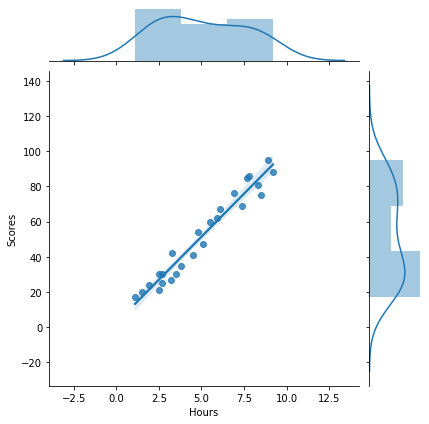

In [9]:
sns.jointplot('Hours','Scores',data=data,kind='reg');


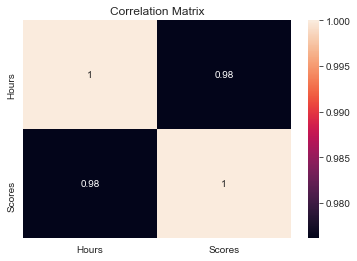

In [10]:
sns.set_style('whitegrid')
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix');


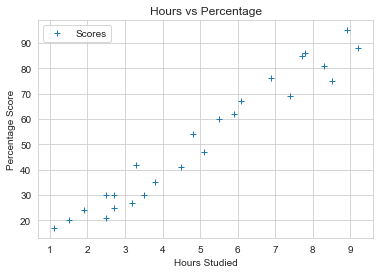

In [11]:
data.plot(x='Hours', y='Scores', style='+')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


# Splitting

In [12]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values


In [13]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
print(Y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)

In [16]:
X_train.shape

(18, 1)

In [17]:
Y_train.shape

(18,)

In [18]:
X_test.shape

(7, 1)

In [19]:
Y_test.shape

(7,)

# Model Building

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
Y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Hrs':[i[0] for i in X_test], 'Predicted Marks':[k for k in Y_pred]})
prediction

,Hrs,Predicted Marks
0,6.1,60.674362
1,1.9,19.997923
2,4.5,45.178576
3,6.9,68.422255
4,8.9,87.791989
5,2.5,25.808842
6,3.3,33.556736


In [27]:
compare_scores = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks':Y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,67,60.674362
1,24,19.997923
2,41,45.178576
3,76,68.422255
4,95,87.791989
5,30,25.808842
6,42,33.556736


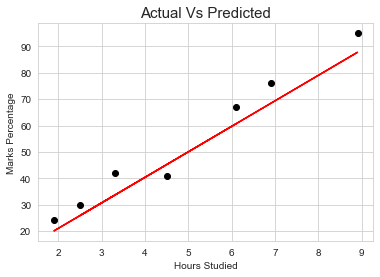

In [28]:
plt.scatter(x=X_test,y=Y_test,color='black')
plt.plot(X_test,Y_pred,color='red')
plt.title('Actual Vs Predicted',size=15)
plt.ylabel('Marks Percentage',size=10)
plt.xlabel('Hours Studied',size=10)
plt.show()

# Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score

In [30]:
print('Mean Absolute Error: ',mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error:  5.989495552434456


In [31]:
print('R2 Score is :',r2_score(Y_test,Y_pred))

R2 Score is : 0.9340752536504426


In [32]:
hrs = [9.25]
answer = regressor.predict([hrs])
print("Score = {}".format(round(answer[0],3)))


Score = 91.182


# In this problem statement we see that if the student studies for 9.25 hrs, they are likely to score a percentage of 91.182% .